In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%pylab inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
x = train_data.drop(['redshift'], axis = 1)
y = train_data.redshift

x_test = test_data.drop(['id'], axis = 1)

### Here comes the forest, pretty basic

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X = train_data.drop(['redshift'], axis = 1)
y = train_data.redshift

#regr = RandomForestRegressor(max_depth=10, random_state=10, n_estimators=200)
#regr.fit(X[:400000], y[:400000])

In [ ]:
y_pred = regr.predict(X[400000:])

In [ ]:
y_pred

In [ ]:
print('RMSE: ', sqrt(((y[400000:]-y_pred)**2).mean()))

In [7]:
X = X.drop(['id'], axis = 1)

### well, the train set and the test set was not splitted
    That's why the good results..
### now it's splitted, it still yields good results.

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(Dense(600, kernel_initializer='normal', input_shape=(5,)))
model.add(Activation('sigmoid'))
model.add(Dense(400, kernel_initializer='normal',input_shape=(6,)))

model.add(Activation('sigmoid'))
model.add(Dense(1))


In [10]:
model.compile(optimizer='sgd',
              loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 600)               3600      
_________________________________________________________________
activation_1 (Activation)    (None, 600)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               240400    
_________________________________________________________________
activation_2 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 401       
Total params: 244,401
Trainable params: 244,401
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X[:400000], y[:400000], epochs=6, shuffle=True,batch_size=None)

Epoch 1/6
400000/400000 [==============================] - 62s 155us/step - loss: 0.0914
Epoch 2/6
400000/400000 [==============================] - 57s 143us/step - loss: 0.0105
Epoch 3/6
400000/400000 [==============================] - 49s 122us/step - loss: 0.0102
Epoch 4/6
400000/400000 [==============================] - 55s 138us/step - loss: 0.0101
Epoch 5/6
400000/400000 [==============================] - 58s 144us/step - loss: 0.0100
Epoch 6/6
400000/400000 [==============================] - 51s 127us/step - loss: 0.0099


In [12]:
score = model.evaluate(X[400000:], y[400000:], batch_size=10)

100000/100000 [==============================] - 12s 118us/step


In [13]:
print(score)

0.00946798778572993


In [14]:
ypred= model.predict(X[400000:])

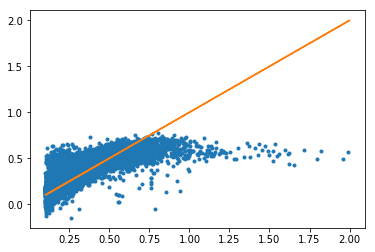

In [15]:
plot(y[400000::5], ypred[::5], '.')
plot(y,y)